In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
data = load_breast_cancer(as_frame=True)

In [3]:
X=data.data
y=data.target

In [4]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [6]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Number of samples: 569
Number of features: 30


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
model1 = Sequential()
model1.add(Input(30)) ## Input layer

In [50]:
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu')) ## Two hidden layers with 32 nodes

In [51]:
model1.add(Dense(units=2, activation='softmax')) ## Output/Final layer with softmax activation

In [52]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=120, batch_size=10, validation_data=(X_test,y_test)) ## Fitting train data

Epoch 1/120
39/39 [==============================] - 1s 16ms/step - loss: 28.2029 - accuracy: 0.4179 - val_loss: 1.4643 - val_accuracy: 0.7926
Epoch 2/120
39/39 [==============================] - 0s 10ms/step - loss: 0.8366 - accuracy: 0.8778 - val_loss: 0.3470 - val_accuracy: 0.9309
Epoch 3/120
39/39 [==============================] - 0s 10ms/step - loss: 0.5450 - accuracy: 0.9249 - val_loss: 0.2673 - val_accuracy: 0.9521
Epoch 4/120
39/39 [==============================] - 0s 10ms/step - loss: 0.4581 - accuracy: 0.8700 - val_loss: 0.3102 - val_accuracy: 0.9309
Epoch 5/120
39/39 [==============================] - 0s 10ms/step - loss: 0.6984 - accuracy: 0.8809 - val_loss: 0.4673 - val_accuracy: 0.9096
Epoch 6/120
39/39 [==============================] - 0s 10ms/step - loss: 0.9633 - accuracy: 0.8447 - val_loss: 0.3341 - val_accuracy: 0.9255
Epoch 7/120
39/39 [==============================] - 0s 9ms/step - loss: 0.8321 - accuracy: 0.8887 - val_loss: 0.4384 - val_accuracy: 0.9149
Epoch 

39/39 [==============================] - 0s 9ms/step - loss: 0.2953 - accuracy: 0.9259 - val_loss: 0.0794 - val_accuracy: 0.9734
Epoch 59/120
39/39 [==============================] - 0s 10ms/step - loss: 0.4042 - accuracy: 0.9041 - val_loss: 0.1168 - val_accuracy: 0.9574
Epoch 60/120
39/39 [==============================] - 0s 9ms/step - loss: 0.1862 - accuracy: 0.9460 - val_loss: 0.1295 - val_accuracy: 0.9574
Epoch 61/120
39/39 [==============================] - 0s 9ms/step - loss: 0.2161 - accuracy: 0.9418 - val_loss: 0.3097 - val_accuracy: 0.8830
Epoch 62/120
39/39 [==============================] - 0s 9ms/step - loss: 0.3600 - accuracy: 0.8845 - val_loss: 0.1031 - val_accuracy: 0.9574
Epoch 63/120
39/39 [==============================] - 0s 10ms/step - loss: 0.2812 - accuracy: 0.9012 - val_loss: 0.3014 - val_accuracy: 0.8830
Epoch 64/120
39/39 [==============================] - 0s 10ms/step - loss: 0.2106 - accuracy: 0.9188 - val_loss: 1.0940 - val_accuracy: 0.6489
Epoch 65/120
39/

39/39 [==============================] - 0s 13ms/step - loss: 0.3170 - accuracy: 0.8950 - val_loss: 0.1062 - val_accuracy: 0.9521
Epoch 116/120
39/39 [==============================] - 0s 11ms/step - loss: 0.2783 - accuracy: 0.9120 - val_loss: 0.1292 - val_accuracy: 0.9521
Epoch 117/120
39/39 [==============================] - 0s 11ms/step - loss: 0.3674 - accuracy: 0.8864 - val_loss: 0.2741 - val_accuracy: 0.9043
Epoch 118/120
39/39 [==============================] - 0s 11ms/step - loss: 0.2408 - accuracy: 0.9115 - val_loss: 0.1663 - val_accuracy: 0.9415
Epoch 119/120
39/39 [==============================] - 0s 10ms/step - loss: 0.3187 - accuracy: 0.9228 - val_loss: 0.0722 - val_accuracy: 0.9734
Epoch 120/120
39/39 [==============================] - 0s 9ms/step - loss: 0.2290 - accuracy: 0.9354 - val_loss: 0.0894 - val_accuracy: 0.9787


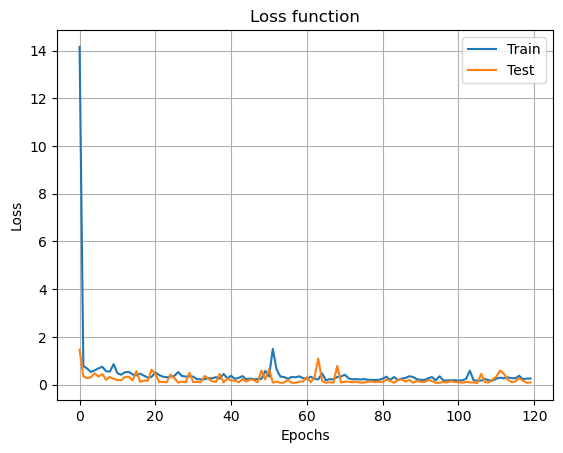

In [53]:
train_loss = model1.history.history["loss"]
val_loss = model1.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim((0,250))
plt.legend(["Train", "Test"])
plt.grid()
plt.title("Loss function")
plt.show()

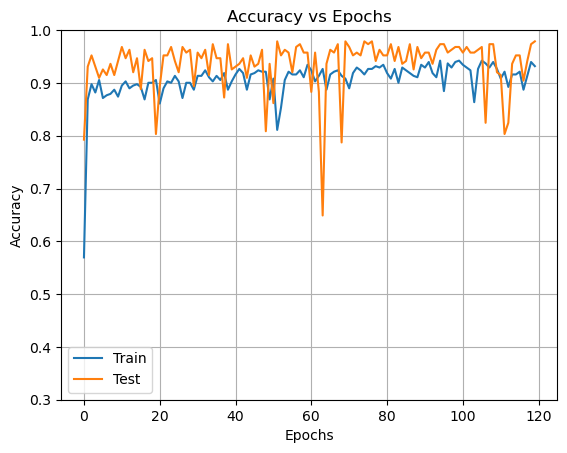

In [54]:
train_acc = model1.history.history["accuracy"]
val_acc = model1.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.ylim(0.3,1)
plt.legend(["Train", "Test"])
plt.grid()
plt.title("Accuracy vs Epochs")
plt.show()

# Model 2

In [104]:
model2 = Sequential()
model2.add(Input(30))

In [105]:
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))

In [106]:
model2.add(Dense(units=2, activation='softmax'))

In [107]:
model2.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=120, batch_size=5, validation_data=(X_test,y_test))

Epoch 1/120
77/77 [==============================] - 1s 12ms/step - loss: 42.3496 - accuracy: 0.5426 - val_loss: 10.6209 - val_accuracy: 0.2181
Epoch 2/120
77/77 [==============================] - 1s 9ms/step - loss: 9.2512 - accuracy: 0.2397 - val_loss: 5.8921 - val_accuracy: 0.2394
Epoch 3/120
77/77 [==============================] - 1s 9ms/step - loss: 5.3410 - accuracy: 0.3243 - val_loss: 2.6669 - val_accuracy: 0.4947
Epoch 4/120
77/77 [==============================] - 1s 9ms/step - loss: 2.3023 - accuracy: 0.6524 - val_loss: 0.8496 - val_accuracy: 0.7447
Epoch 5/120
77/77 [==============================] - 1s 9ms/step - loss: 1.1208 - accuracy: 0.7492 - val_loss: 0.5873 - val_accuracy: 0.7872
Epoch 6/120
77/77 [==============================] - 1s 12ms/step - loss: 0.6300 - accuracy: 0.8141 - val_loss: 0.4006 - val_accuracy: 0.8936
Epoch 7/120
77/77 [==============================] - 1s 17ms/step - loss: 0.4041 - accuracy: 0.8594 - val_loss: 0.3190 - val_accuracy: 0.8617
Epoch 8/

77/77 [==============================] - 1s 9ms/step - loss: 0.2202 - accuracy: 0.9239 - val_loss: 0.2337 - val_accuracy: 0.9096
Epoch 59/120
77/77 [==============================] - 1s 9ms/step - loss: 0.2072 - accuracy: 0.9203 - val_loss: 0.1722 - val_accuracy: 0.9255
Epoch 60/120
77/77 [==============================] - 1s 12ms/step - loss: 0.2232 - accuracy: 0.9095 - val_loss: 0.2821 - val_accuracy: 0.8936
Epoch 61/120
77/77 [==============================] - 2s 21ms/step - loss: 0.5064 - accuracy: 0.8632 - val_loss: 0.1129 - val_accuracy: 0.9521
Epoch 62/120
77/77 [==============================] - 1s 12ms/step - loss: 0.2494 - accuracy: 0.8871 - val_loss: 0.4806 - val_accuracy: 0.7979
Epoch 63/120
77/77 [==============================] - 1s 11ms/step - loss: 0.4356 - accuracy: 0.8631 - val_loss: 0.1755 - val_accuracy: 0.9255
Epoch 64/120
77/77 [==============================] - 1s 10ms/step - loss: 0.2667 - accuracy: 0.8820 - val_loss: 0.0894 - val_accuracy: 0.9734
Epoch 65/120
7

77/77 [==============================] - 1s 11ms/step - loss: 0.2095 - accuracy: 0.9311 - val_loss: 0.2309 - val_accuracy: 0.9202
Epoch 116/120
77/77 [==============================] - 2s 24ms/step - loss: 0.2740 - accuracy: 0.8815 - val_loss: 0.3187 - val_accuracy: 0.8617
Epoch 117/120
77/77 [==============================] - 1s 13ms/step - loss: 0.2282 - accuracy: 0.9111 - val_loss: 0.0769 - val_accuracy: 0.9787
Epoch 118/120
77/77 [==============================] - 1s 11ms/step - loss: 0.1986 - accuracy: 0.9190 - val_loss: 0.0663 - val_accuracy: 0.9787
Epoch 119/120
77/77 [==============================] - 1s 11ms/step - loss: 0.1823 - accuracy: 0.9275 - val_loss: 0.0898 - val_accuracy: 0.9574
Epoch 120/120
77/77 [==============================] - 1s 11ms/step - loss: 0.2645 - accuracy: 0.8973 - val_loss: 0.0816 - val_accuracy: 0.9894


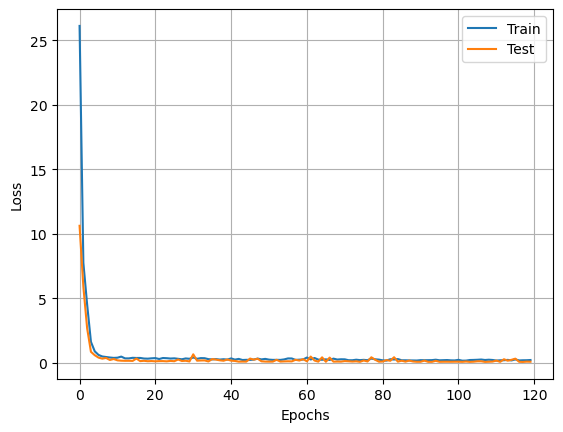

In [108]:
train_loss = model2.history.history["loss"]
val_loss = model2.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim((0,250))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

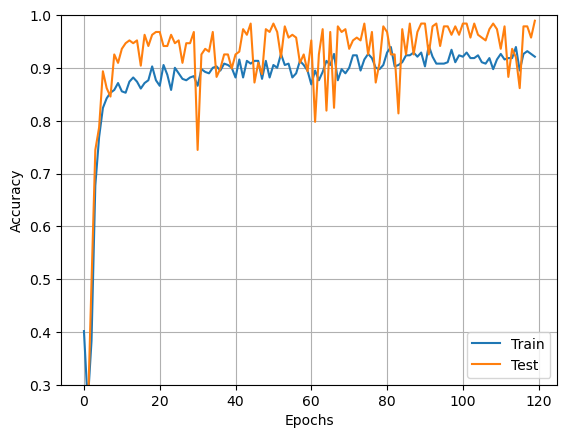

In [109]:
train_acc = model2.history.history["accuracy"]
val_acc = model2.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.ylim(0.3,1)
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [46]:
### Overfitting since validation loss is not improving and accuracy doesnt not change over epochs